In [2]:
# import the necessary packages
from keras.datasets import fashion_mnist

print("[INFO] loading Fashion MNIST...")
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

Using TensorFlow backend.


[INFO] loading Fashion MNIST...


# Problem

1. (25%) Please implement a CNN for image recognition. You need to design at least two layers of
convolutional layers and analyze the effect of different settings including stride size and filter size.
The objective function is E(w) = −
1
m
X
M
m=1
X
C
i=1
tmilogSi
, (1)
where tmi is the ith target of the mth sample in the batch, M is the batch size, C is the classes
for each sample, Si
is softmax activation of neural nets output function.

In [32]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K
from keras import models

In [8]:
from sklearn.metrics import classification_report
from keras.optimizers import SGD
from keras.datasets import fashion_mnist
from keras.utils import np_utils
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import cv2

labels = ["top", "trouser", "pullover", "dress", "coat","sandal", "shirt", "sneaker", "bag", "ankle boot"]

In [7]:
if K.image_data_format() == "channels_first":
    trainX = trainX.reshape((trainX.shape[0], 1, 28, 28))
    testX = testX.reshape((testX.shape[0], 1, 28, 28))
else:
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [9]:
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0
 
trainY = np_utils.to_categorical(trainY, 10)
testY = np_utils.to_categorical(testY, 10)

In [18]:
def Model(width, height, depth, classes, FS, units):
    model = Sequential()
    inputShape = (height, width, depth)
    chanDim = -1
 
    if K.image_data_format() == "channels_first":
        inputShape = (depth, height, width)
        chanDim = 1
        
    model.add(Conv2D(32, (FS, FS), padding="same",input_shape=inputShape, activation='relu'))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(32, (FS, FS), padding="same", activation='relu'))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # second layer
    model.add(Conv2D(64, (FS, FS), padding="same", activation = 'relu'))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(64, (FS, FS), padding="same", activation = 'relu'))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(units, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    # softmax 
    model.add(Dense(classes, activation = 'softmax'))

    return model

In [19]:
#try first setting
EPOCHS = 10
LR = 1e-1
BS = 32

opt = SGD(lr=LR, momentum=0.9, decay=LR / EPOCHS)
model1 = Model(width=28, height=28, depth=1, classes=10, FS = 3, units= 256)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
 
# training
print("[INFO] training model...")
history1 = model1.fit(trainX, trainY, validation_data = (testX, testY), batch_size=BS, epochs=EPOCHS)

[INFO] training model...
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 186s 3ms/step - loss: 0.6268 - acc: 0.7842 - val_loss: 0.4216 - val_acc: 0.8457
Epoch 2/10
60000/60000 [==============================] - 177s 3ms/step - loss: 0.4759 - acc: 0.8272 - val_loss: 0.3967 - val_acc: 0.8582
Epoch 3/10
60000/60000 [==============================] - 168s 3ms/step - loss: 0.4517 - acc: 0.8352 - val_loss: 0.3859 - val_acc: 0.8612
Epoch 4/10
60000/60000 [==============================] - 169s 3ms/step - loss: 0.4376 - acc: 0.8411 - val_loss: 0.3746 - val_acc: 0.8652
Epoch 5/10
60000/60000 [==============================] - 171s 3ms/step - loss: 0.4286 - acc: 0.8445 - val_loss: 0.3655 - val_acc: 0.8686
Epoch 6/10
60000/60000 [==============================] - 172s 3ms/step - loss: 0.4239 - acc: 0.8474 - val_loss: 0.3600 - val_acc: 0.8712
Epoch 7/10
60000/60000 [==============================] - 175s 3ms/step - loss: 0.4142 - acc: 0.8

In [20]:
#try second setting
EPOCHS = 10
LR = 1e-1
BS = 32

opt = SGD(lr=LR, momentum=0.9, decay=LR / EPOCHS)
model1 = Model(width=28, height=28, depth=1, classes=10, FS = 5, units= 512)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
 
# training
print("[INFO] training model...")
history1 = model1.fit(trainX, trainY, validation_data = (testX, testY), batch_size=BS, epochs=EPOCHS)

[INFO] training model...
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 294s 5ms/step - loss: 1.1463 - acc: 0.7372 - val_loss: 0.4990 - val_acc: 0.8138
Epoch 2/10
60000/60000 [==============================] - 290s 5ms/step - loss: 0.5576 - acc: 0.7941 - val_loss: 0.4700 - val_acc: 0.8228
Epoch 3/10
60000/60000 [==============================] - 287s 5ms/step - loss: 0.5201 - acc: 0.8096 - val_loss: 0.4561 - val_acc: 0.8288
Epoch 4/10
60000/60000 [==============================] - 288s 5ms/step - loss: 0.5066 - acc: 0.8151 - val_loss: 0.4404 - val_acc: 0.8367
Epoch 5/10
60000/60000 [==============================] - 290s 5ms/step - loss: 0.4994 - acc: 0.8175 - val_loss: 0.4319 - val_acc: 0.8407
Epoch 6/10
60000/60000 [==============================] - 291s 5ms/step - loss: 0.4947 - acc: 0.8208 - val_loss: 0.4269 - val_acc: 0.8422
Epoch 7/10
60000/60000 [==============================] - 322s 5ms/step - loss: 0.4807 - acc: 0.8

In [22]:
#try third setting
EPOCHS = 15
LR = 1e-1
BS = 32

opt = SGD(lr=LR, momentum=0.9, decay=LR / EPOCHS)
model1 = Model(width=28, height=28, depth=1, classes=10, FS = 5, units= 512)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
 
# training
print("[INFO] training model...")
history1 = model1.fit(trainX, trainY, validation_data = (testX, testY), batch_size=BS, epochs=EPOCHS)

[INFO] training model...
Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 314s 5ms/step - loss: 0.9099 - acc: 0.7351 - val_loss: 0.5124 - val_acc: 0.8053
Epoch 2/15
60000/60000 [==============================] - 317s 5ms/step - loss: 0.5625 - acc: 0.7907 - val_loss: 0.4775 - val_acc: 0.8194
Epoch 3/15
60000/60000 [==============================] - 313s 5ms/step - loss: 0.5321 - acc: 0.8015 - val_loss: 0.4620 - val_acc: 0.8286
Epoch 4/15
60000/60000 [==============================] - 322s 5ms/step - loss: 0.5133 - acc: 0.8095 - val_loss: 0.4511 - val_acc: 0.8321cc: 0.809 - ETA: 3s - loss
Epoch 5/15
60000/60000 [==============================] - 314s 5ms/step - loss: 0.5043 - acc: 0.8136 - val_loss: 0.4415 - val_acc: 0.8375
Epoch 6/15
60000/60000 [==============================] - 313s 5ms/step - loss: 0.4973 - acc: 0.8167 - val_loss: 0.4345 - val_acc: 0.8383
Epoch 7/15
60000/60000 [==============================] - 311s 5ms/step

In [26]:
#try fourth setting
EPOCHS = 25
LR = 1e-2
BS = 32

opt = SGD(lr=LR, momentum=0.9, decay=LR / EPOCHS)
model = Model(width=28, height=28, depth=1, classes=10, FS = 3, units = 512)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
 
# training
print("[INFO] training model...")
history = model.fit(trainX, trainY, validation_data = (testX, testY), batch_size=BS, epochs=EPOCHS)

[INFO] training model...
Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 249s 4ms/step - loss: 0.5301 - acc: 0.8230 - val_loss: 0.3393 - val_acc: 0.8775
Epoch 2/25
60000/60000 [==============================] - 241s 4ms/step - loss: 0.3355 - acc: 0.8806 - val_loss: 0.2687 - val_acc: 0.9030
Epoch 3/25
60000/60000 [==============================] - 233s 4ms/step - loss: 0.2898 - acc: 0.8960 - val_loss: 0.2490 - val_acc: 0.9096
Epoch 4/25
60000/60000 [==============================] - 237s 4ms/step - loss: 0.2643 - acc: 0.9039 - val_loss: 0.2296 - val_acc: 0.9151
Epoch 5/25
60000/60000 [==============================] - 240s 4ms/step - loss: 0.2499 - acc: 0.9095 - val_loss: 0.2271 - val_acc: 0.9182
Epoch 6/25
60000/60000 [==============================] - 243s 4ms/step - loss: 0.2380 - acc: 0.9135 - val_loss: 0.2193 - val_acc: 0.9215
Epoch 7/25
60000/60000 [==============================] - 243s 4ms/step - loss: 0.2271 - acc: 0.9

In [48]:
# use the fourth setting to make predictions on the test set
preds = model.predict(testX)
 
print("model evaluation")
print(classification_report(testY.argmax(axis=1), preds.argmax(axis=1),target_names=labels))
 

model evaluation
              precision    recall  f1-score   support

         top       0.91      0.84      0.88      1000
     trouser       1.00      0.98      0.99      1000
    pullover       0.92      0.90      0.91      1000
       dress       0.93      0.93      0.93      1000
        coat       0.86      0.93      0.90      1000
      sandal       0.99      0.99      0.99      1000
       shirt       0.78      0.81      0.79      1000
     sneaker       0.96      0.98      0.97      1000
         bag       0.99      0.99      0.99      1000
  ankle boot       0.98      0.97      0.98      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



2. (25%) Plot the learning curve, accuracy rate of training and test sets as the example found in
Figure 1, and Figure 2.

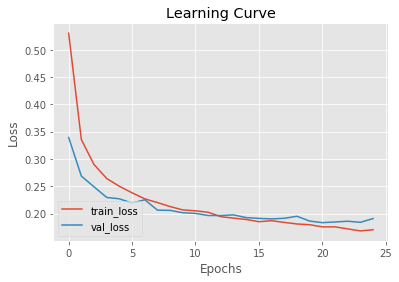

In [33]:
#learning curve plot
plt.style.use('ggplot')
N = EPOCHS
plt.figure()
plt.plot(np.arange(0,N), history.history['loss'], label = 'train_loss')
plt.plot(np.arange(0,N), history.history['val_loss'], label = 'val_loss')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='lower left')

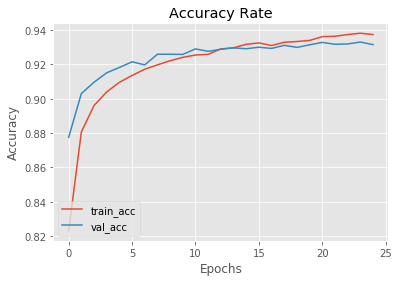

In [30]:
#accuracy rate plot
plt.figure()
plt.plot(np.arange(0,EPOCHS), history.history['acc'], label = 'train_acc')
plt.plot(np.arange(0,EPOCHS), history.history['val_acc'], label = 'val_acc')
plt.title('Accuracy Rate')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower left')

3. (25%) Please plot activations of the first layer as illustrated in Figure.4. Please also plot the
corresponding image with your prediction and label (see Figure 3) and explain what you observe.

ankle boot


C:\Users\Jessica\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=Tensor("co...)`
  


(-0.5, 27.5, 27.5, -0.5)

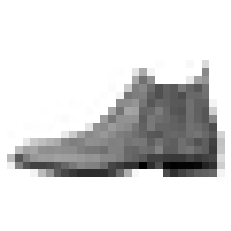

In [34]:
layer_outputs = [layer.output for layer in model.layers[:1]] #first layer
act_model = models.Model(input = model.input, outputs = layer_outputs)

#show first test image and its label
img = testX[0].reshape(1,28,28,1)
prediction = preds.argmax(axis=1)
label = labels[prediction[0]]
print(label)
plt.imshow(img[0,:,:,0],cmap='binary')
plt.axis('off')

C:\Users\Jessica\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


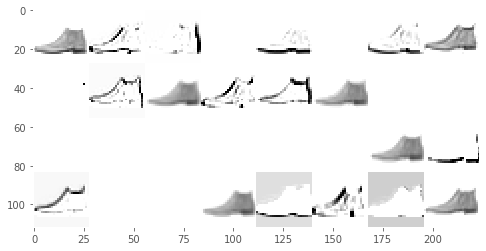

In [47]:
#show activations of the first layer
act = act_model.predict(img)

img_row = 8
first_act = act[0] #first layer activation 
features = first_act.shape[-1]
size = first_act.shape[1]
first_act = first_act.reshape(1,28,28,32)
n_cols = features // img_row
display_grid = np.zeros((size * n_cols, img_row * size))
for col in range(n_cols):
    for row in range(img_row):
        chan_img = first_act[0,:, :,col * img_row + row]
        chan_img -= chan_img.mean() 
        chan_img /= chan_img.std()
        chan_img *= 64
        chan_img = np.clip(chan_img, 0, 255).astype('uint8')
        display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = chan_img
        scale = 1 / size
plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap='binary')

The first layer retains almost the full shape. We can see the outer shape of the shoes from most of the images.

4. (25%) Please classify the clothing and plot the corresponding image and label (see Figure 5). The
color of the label is green, it means the prediction is successful. If the color is red, it means the
prediction is fails.

In [ ]:
from imutils import build_montages

images = []

for i in np.random.choice(np.arange(0, len(testY)), size=(16,)):
    probs = model.predict(testX[np.newaxis, i])
    prediction = probs.argmax(axis=1)
    label = labels[prediction[0]]
    if K.image_data_format() == "channels_first":
        image = (testX[i][0] * 255).astype("uint8")
    else:
        image = (testX[i] * 255).astype("uint8")
    #green text if correct
    color = (0, 255, 0)
    #red text if incorrect
    if prediction[0] != np.argmax(testY[i]):
        color = (0, 0, 255)
 
    image = cv2.merge([image] * 3)
    image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)
    cv2.putText(image, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, color, 2)

    images.append(image)

montage = build_montages(images, (96, 96), (4, 4))[0]
 
# show the output
cv2.imshow("Fashion MNIST", montage)
cv2.waitKey(0)

In [ ]:
import matplotlib.image as mpimg
img=mpimg.imread('FashionMNIST.png')
imgplot = plt.imshow(img)
plt.show()